In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
%matplotlib inline

In [2]:
df = pd.read_csv("club_fair.csv")
df["second"] = df["second"]*2
df["hour"] = (df["second"]/3600).astype('int32') + 1
df["abs_seconds"] = df["second"] % 3600
df.head()

,second,Q1 Count,Q2 Count,Q3 Count,Q4 Count,hour,abs_seconds
0,0,14,18,2,2,1,0
1,2,16,17,0,1,1,2
2,4,17,13,2,1,1,4
3,6,19,17,4,1,1,6
4,8,20,15,4,1,1,8


In [3]:
df_minutes = df[df["abs_seconds"] % 60 == 0].copy()
df_minutes["minutes"] = (df_minutes["abs_seconds"]/60).astype('int32')
df_minutes.head()

,second,Q1 Count,Q2 Count,Q3 Count,Q4 Count,hour,abs_seconds,minutes
0,0,14,18,2,2,1,0,0
30,60,14,17,6,1,1,60,1
60,120,34,18,6,3,1,120,2
90,180,29,18,5,0,1,180,3
120,240,22,23,5,2,1,240,4


In [4]:
df_q1 = df_minutes[["minutes", "hour", "Q1 Count"]].copy()
df_q1.rename(columns = {'Q1 Count':'Count'}, inplace = True)

df_q2 = df_minutes[["minutes", "hour", "Q2 Count"]].copy()
df_q2.rename(columns = {'Q2 Count':'Count'}, inplace = True)

df_q3 = df_minutes[["minutes", "hour", "Q3 Count"]].copy()
df_q3.rename(columns = {'Q3 Count':'Count'}, inplace = True)

df_q4 = df_minutes[["minutes", "hour", "Q4 Count"]].copy()
df_q4.rename(columns = {'Q4 Count':'Count'}, inplace = True)
df_q4.head()

,minutes,hour,Count
0,0,1,2
30,1,1,1
60,2,1,3
90,3,1,0
120,4,1,2


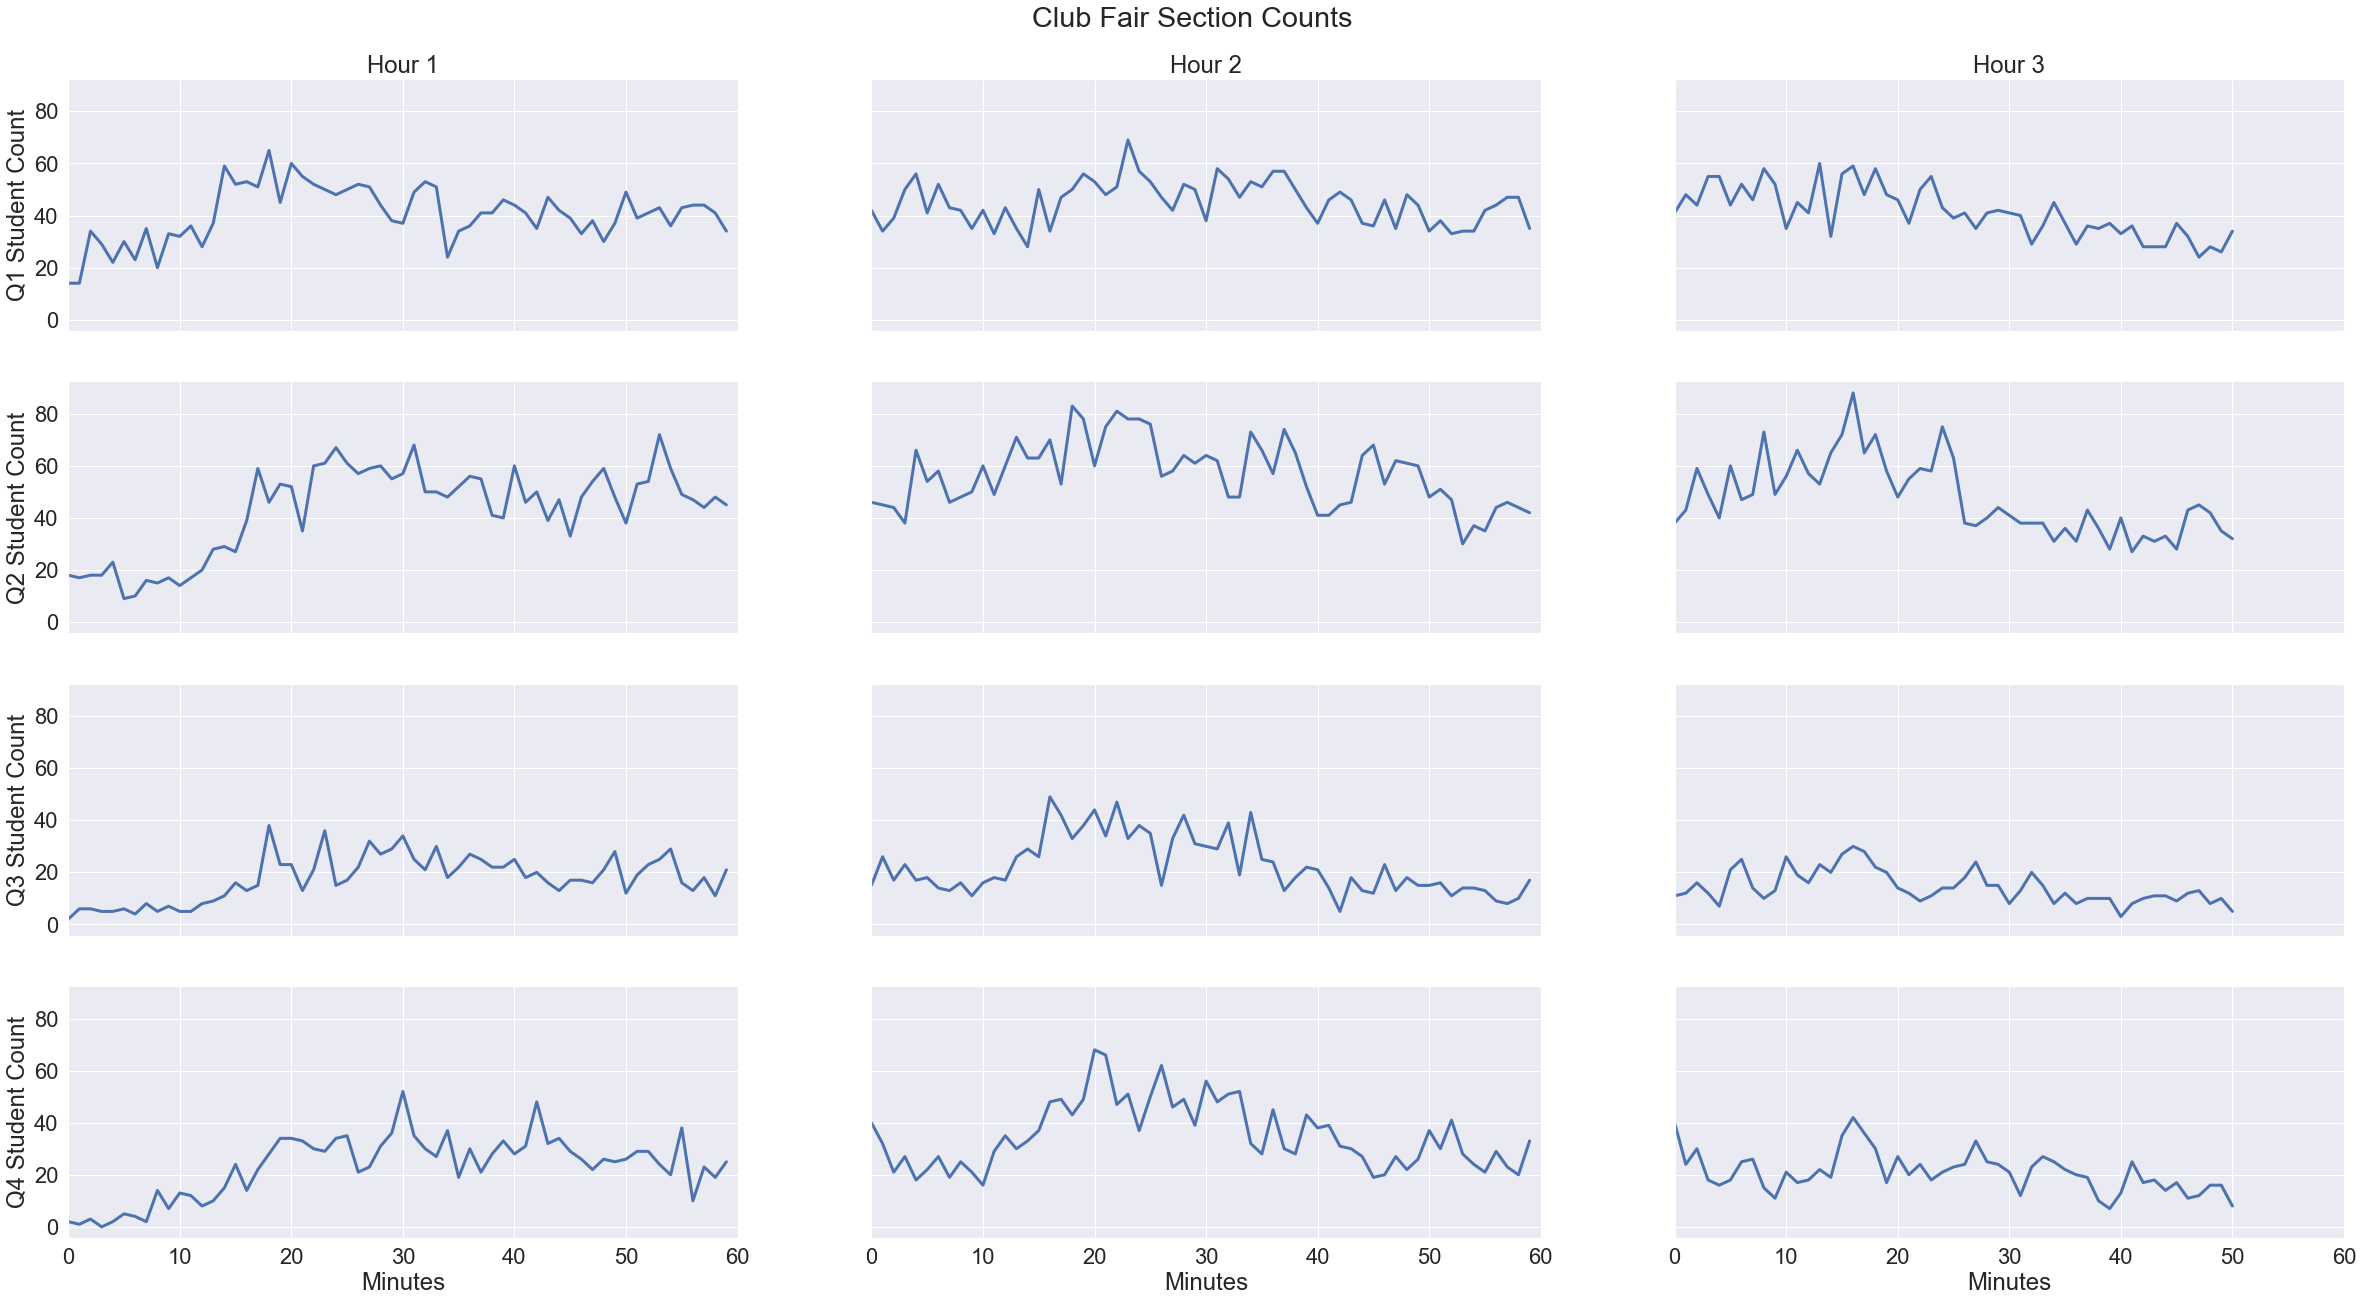

In [5]:
sns.set(rc={'figure.figsize':(40,20)})
sns.set_style("white")
sns.set(font_scale=2)

data = [df_q1, df_q2, df_q3, df_q4]
fig, axes = plt.subplots(4,3, sharex=True, sharey=True)
for i in range(4):
    for j in range(3):
        x = data[i]
        x = x[x["hour"] == (j+1)]
        sns.lineplot(data=x, x="minutes", y="Count", ax=axes[i,j], linewidth=3)
        plt.setp(axes[i, 0], ylabel=f'Q{i+1} Student Count', xlim=(0, 60))
        plt.setp(axes[0, j], title=f'Hour {j+1}')
        
        
plt.setp(axes[-1, :], xlabel='Minutes')

fig.subplots_adjust(top=0.93, left=0.1098)
fig.suptitle("Club Fair Section Counts")

plt.show()